In [14]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans 
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [15]:
data = pd.read_csv("customer_segmentation.csv")
data

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A
...,...,...,...,...,...,...,...,...,...,...,...
10690,467954,Male,No,29,No,Healthcare,9.0,Low,4.0,Cat_6,NaN
10691,467958,Female,No,35,Yes,Doctor,1.0,Low,1.0,Cat_6,NaN
10692,467960,Female,No,53,Yes,Entertainment,NaN,Low,2.0,Cat_6,NaN
10693,467961,Male,Yes,47,Yes,Executive,1.0,High,5.0,Cat_4,NaN


In [16]:
data.head(10)

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A
5,461319,Male,Yes,56,No,Artist,0.0,Average,2.0,Cat_6,C
6,460156,Male,No,32,Yes,Healthcare,1.0,Low,3.0,Cat_6,C
7,464347,Female,No,33,Yes,Healthcare,1.0,Low,3.0,Cat_6,D
8,465015,Female,Yes,61,Yes,Engineer,0.0,Low,3.0,Cat_7,D
9,465176,Female,Yes,55,Yes,Artist,1.0,Average,4.0,Cat_6,C


In [17]:
data= data.drop(columns=['ID', 'Gender', 'Ever_Married', 'Graduated', 'Profession',
        'Spending_Score', 'Var_1',
       'Segmentation'])

In [18]:
data.head()

,Age,Work_Experience,Family_Size
0,22,1.0,4.0
1,38,NaN,3.0
2,67,1.0,1.0
3,67,0.0,2.0
4,40,NaN,6.0


In [19]:
data.isnull().sum()

Age                   0
Work_Experience    1098
Family_Size         448
dtype: int64

In [20]:
data = data.dropna()

In [21]:
data.isnull().sum()

Age                0
Work_Experience    0
Family_Size        0
dtype: int64

In [22]:
scaler =  StandardScaler()
data_scaler = scaler.fit_transform(data)

In [23]:
data_scaler

array([[-1.29420836, -0.47629886,  0.75349091],
       [ 1.41867106, -0.47629886, -1.19897576],
       [ 1.41867106, -0.77173851, -0.54815354],
       ...,
       [-0.51048764, -0.47629886, -1.19897576],
       [ 0.21294687, -0.47629886,  1.40431313],
       [-0.02819797,  1.88721829,  0.10266869]])

In [24]:
inertia_values = []
silhouette_score_list = []
k_range = range(2,10)

for  k in k_range:
    k_means= KMeans(n_clusters = k, random_state=42)
    k_means.fit(data_scaler)

    inertia_values.append(k_means.inertia_)

    silhouette = silhouette_score(data_scaler,k_means.labels_)
    silhouette_score_list.append(silhouette)

In [25]:
inertia_values

[20124.07109280248,
 13014.664681611672,
 9801.31270715444,
 8531.05058881542,
 7323.934017203172,
 6309.327486234021,
 5837.207684092016,
 5495.217968385097]

AttributeError: Line2D.set() got an unexpected keyword argument 'Markdown'

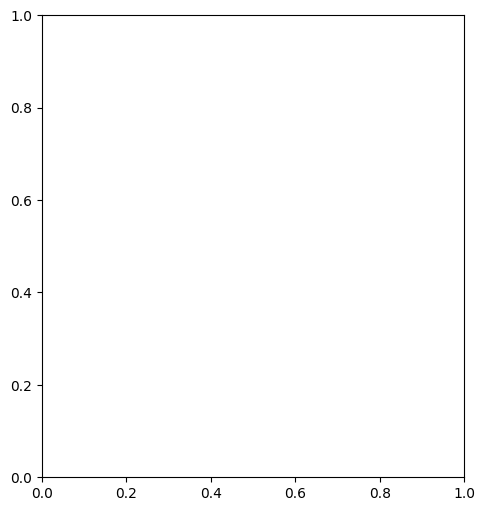

In [26]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.plot(k_range,inertia_values,Markdown='o',linestyle='--')
plt.xlabel('Number of cluster (k)')
plt.ylabel('Inertia(within - cluster sum of sqares)')
plt.title('eblow method')
plt.show()

ValueError: x and y must have same first dimension, but have shapes (8,) and (1,)

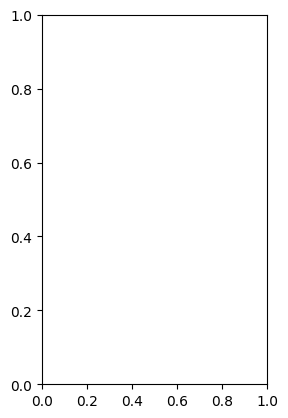

In [54]:
plt.subplot(1,2,1)
plt.plot(k_range,silhouette_score,Markdown='o')
plt.xlabel('Number of cluster (k)')
plt.ylabel('Silhouette score')
plt.title('Silhouette score')
plt.show()